In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

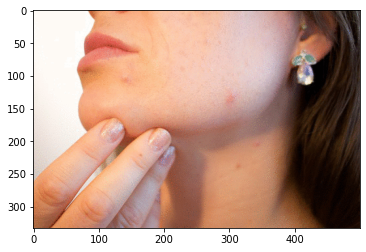

(333, 500, 3)


In [9]:
image = cv2.imread('blemish.png')
plt.imshow(image[:,:,::-1])
# plt.axis('off')
plt.show()
print(image.shape)

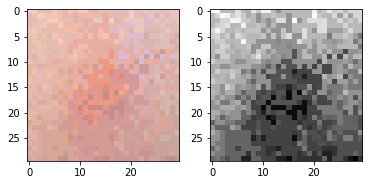

In [136]:
center = (135, 302)
r = 15

blemish = image[center[0]-r:center[0]+r,center[1]-r:center[1]+r]
plt.subplot(1, 2, 1)
plt.imshow(blemish[:,:,::-1])

blemish_gray = cv2.cvtColor(blemish, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 2, 2)
plt.imshow(blemish_gray, cmap='gray')

# plt.axis('off')
plt.show()

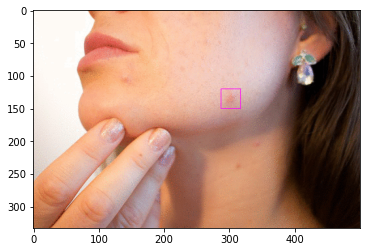

In [137]:
rect = image.copy()

cv2.rectangle(rect, (287, 120), (317, 150), color=(255, 0, 255))
plt.imshow(rect[:,:,::-1])
# plt.axis('off')
plt.show()

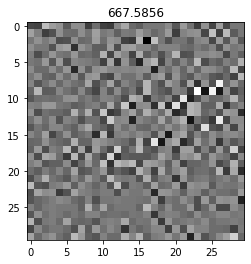

In [138]:
lap = cv2.Laplacian(blemish_gray, cv2.CV_32F)
plt.imshow(lap, cmap='gray')
plt.title(np.var(lap))
plt.show()

In [139]:
center_2 = (center[0] - r*2, center[1] + r*2) # upper right
center_3 = (center[0] - r*2, center[1])       # upper middle
center_4 = (center[0] - r*2, center[1] - r*2) # upper left

center_1 = (center[0], center[1] + r*2)       # right
center_5 = (center[0], center[1])             # middle
center_6 = (center[0], center[1] - r*2)       # left

center_7 = (center[0] + r*2, center[1] - r*2) # buttom left
center_8 = (center[0] + r*2, center[1] )      # buttom middle
center_9 = (center[0] + r*2, center[1] + r*2) # buttom right

In [140]:
def calc_lap(image, center, r):
    
    sel = image[center[0]-r:center[0]+r,
                    center[1]-r:center[1]+r]
    
    sel_gray = cv2.cvtColor(sel, cv2.COLOR_BGR2GRAY)
    
    lap = cv2.Laplacian(sel_gray, cv2.CV_32F)
    
    return sel_gray, lap

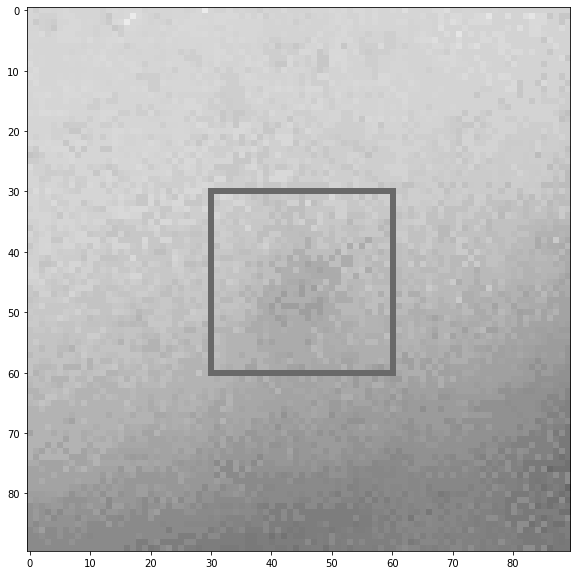

In [141]:
plt.figure(figsize=(10, 10))
sel = rect[middle[0] - r*2 -15 : middle[0] + r*2 + 15, middle[1] - r*2 - 15 : middle[1] + r*2 +15 ]
sel_gr = cv2.cvtColor(sel, cv2.COLOR_BGR2GRAY)
plt.imshow(sel_gr, cmap='gray', vmin=0, vmax=255)
plt.show()

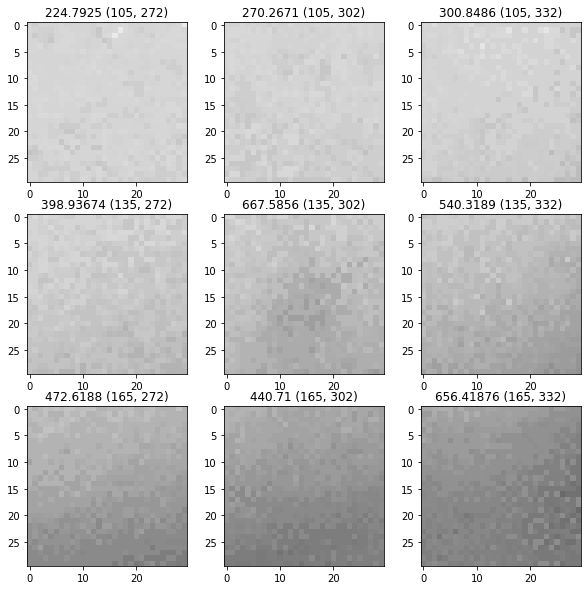

In [143]:
plt.figure(figsize=(10, 10))

# middle = (135, 302)

plt.subplot(3, 3, 1)
gr, lap = calc_lap(image=image, center=center_4, r=15)
plt.title(str(np.var(lap))+' '+str(center_4))
plt.imshow(gr, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 2)
gr, lap = calc_lap(image=image, center=center_3, r=15)
plt.title(str(np.var(lap))+' '+str(center_3))
plt.imshow(gr, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 3)
gr, lap = calc_lap(image=image, center=center_2, r=15)
plt.title(str(np.var(lap))+' '+str(center_2))
plt.imshow(gr, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 4)
gr, lap = calc_lap(image=image, center=center_6, r=15)
plt.title(str(np.var(lap))+' '+str(center_6))
plt.imshow(gr, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 5)
gr, lap = calc_lap(image=image, center=center_5, r=15)
plt.title(str(np.var(lap))+' '+str(center_5))
plt.imshow(gr, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 6)
gr, lap = calc_lap(image=image, center=center_1, r=15)
plt.title(str(np.var(lap))+' '+str(center_1))
plt.imshow(gr, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 7)
gr, lap = calc_lap(image=image, center=center_7, r=15)
plt.title(str(np.var(lap))+' '+str(center_7))
plt.imshow(gr, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 8)
gr, lap = calc_lap(image=image, center=center_8, r=15)
plt.title(str(np.var(lap))+' '+str(center_8))
plt.imshow(gr, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 9)
gr, lap = calc_lap(image=image, center=center_9, r=15)
plt.title(str(np.var(lap))+' '+str(center_9))
plt.imshow(gr, cmap='gray', vmin=0, vmax=255)

plt.show()

In [144]:
def find_min_middle(image, center, r):

    
    gr, lap = calc_lap(image=image, center=center, r=r)
    min_var = np.var(lap)
    center_min_var = center
    
    moves = [(-1, 1), (-1, 0), (-1, -1), (0, 1), (0, -1), (1, -1), (1, 0), (1, 1)]
    
    for m in moves:
        
        new_center = (center[0]+m[0]*r*2, center[1]+m[1]*r*2)
        
        gr, lap = calc_lap(image=image, center=new_center, r=15)
        
        if np.var(lap) < min_var: 
            min_var = np.var(lap)
            center_min_var = new_center
            
    return center_min_var

(105, 272)
15


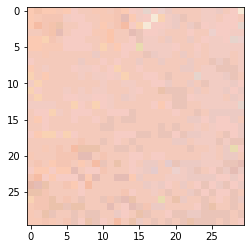

In [150]:
new_center_point = find_min_middle(image, center, r)
print(new_center_point)
print(r)

colorpatch = image[new_center_point[0]-r:new_center_point[0]+r, new_center_point[1]-r:new_center_point[1]+r]

plt.imshow(colorpatch[:,:,::-1])
plt.show()

In [146]:
src_mask = np.ones_like(colorpatch[:,:,0]) * 255
output = cv2.seamlessClone(colorpatch, image, src_mask, (middle[1], middle[0]), cv2.NORMAL_CLONE)

print(middle)
print(colorpatch.shape)
print(image.shape)
print(src_mask.shape)

(135, 302)
(30, 30, 3)
(333, 500, 3)
(30, 30)


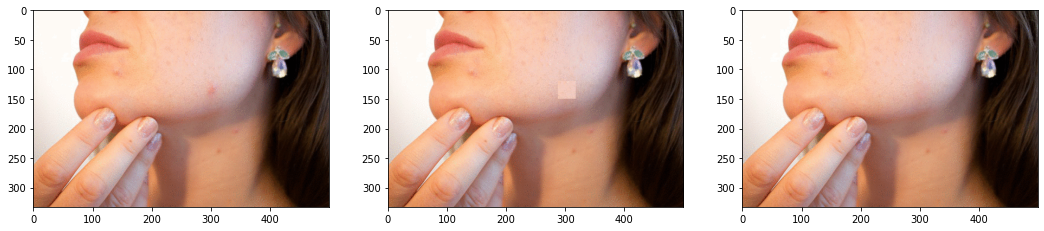

In [147]:
plt.figure(figsize=(18, 10))

plt.subplot(1,3,1)
plt.imshow(image[:,:,::-1])
#plt.axis('off')


plt.subplot(1,3,2)
plt.imshow(src_image[:,:,::-1])
#plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(output[:,:,::-1])
#plt.axis('off')

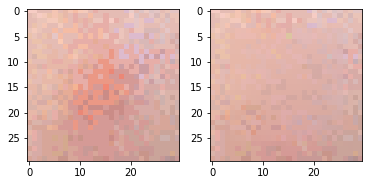

In [148]:
center = (135, 302)
r = 15

blemish = image[center[0]-r:center[0]+r,center[1]-r:center[1]+r]
plt.subplot(1, 2, 1)
plt.imshow(blemish[:,:,::-1])

blemish_gray = cv2.cvtColor(blemish, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 2, 2)
plt.imshow(output[center[0]-r:center[0]+r,center[1]-r:center[1]+r][:,:,::-1])

# plt.axis('off')
plt.show()

In [1]:
# Enter your code here
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


def calc_lap(img, center, r):
    
    sel = img[center[0]-r:center[0]+r, center[1]-r:center[1]+r] 
    sel_gray = cv2.cvtColor(sel, cv2.COLOR_BGR2GRAY) 
    lap = cv2.Laplacian(sel_gray, cv2.CV_32F)
    
    return sel_gray, lap


def find_best_center(img, center, r):

    
    gr, lap = calc_lap(img=img, center=center, r=r)
    min_var = np.var(lap)
    center_min_var = center
    
    moves = [(-1, 1), (-1, 0), (-1, -1), (0, 1), (0, -1), (1, -1), (1, 0), (1, 1)]
    
    for m in moves:
        
        new_center = (center[0]+m[0]*r*2, center[1]+m[1]*r*2)
        
        gr, lap = calc_lap(img=img, center=new_center, r=15)
        
        if np.var(lap) < min_var: 
            min_var = np.var(lap)
            center_min_var = new_center
            
    return center_min_var


def onMouse(action, x, y, flags, img):
    
    if action == cv2.EVENT_LBUTTONDOWN:
        
        center = (y, x)
        r = 15
        
        new_center_point = find_best_center(img, center, r)
        
        colorpatch = img[new_center_point[0]-r:new_center_point[0]+r, new_center_point[1]-r:new_center_point[1]+r]
        src_mask = np.ones_like(colorpatch[:,:,0]) * 255        
        cv2.seamlessClone(colorpatch, img, src_mask, (center[1], center[0]), cv2.NORMAL_CLONE, blend=img)
        
        
img = cv2.imread("blemish.png", 1)
cv2.namedWindow("Window")
cv2.setMouseCallback("Window", onMouse, img)

k = 0
while k != 27:
    cv2.imshow("Window", img)        
    k = cv2.waitKey(20)
    
cv2.destroyAllWindows()